# EDA

In [105]:
# Import libraries
import pandas as pd
import numpy as np

from datetime import datetime
import calendar

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
plt.style.use('fivethirtyeight')

In [106]:
# Load data
df = pd.read_csv('data/clean_df.csv')

In [107]:
df.head()

,date,incident_id,governorate,district,area,target,main_category,sub_category,min_air_raids,max_air_raids,civilian_casualties,fatalities,woman_fatalities,child_fatalities,injured,woman_injured,child_injured,confirmed_time,time_of_day
0,2015-03-26,1,Sanaa,bani al-harith,Al-Rahabah,Al-Daylami Airbase,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,2,morning
1,2015-03-26,2,Sanaa,bani al-harith,Airport,Sana'a International Airport,infrastructure,transport,1,2.0,0,0,0,0,0,0,0.0,2,morning
2,2015-03-26,3,Sanaa,bani al-harith,Al-Sonblah Neighbourhood,Residential Area,civilian,residential area,1,2.0,29,21,3,14,8,0,7.0,2,morning
3,2015-03-26,4,Sanaa,al-sab'ein,Al-Nahdain,Presidential Palace,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning
4,2015-03-26,5,Sanaa,al-thawrah,Al-Nahdhah,Former 1st Armoured Division,military_security_target,military site,1,2.0,0,0,0,0,0,0,0.0,3,morning


In [108]:
# date: make index and convert to datetime 
#df.set_index('date', inplace=True)
#df.index = pd.to_datetime(df.index)
#df.index

In [109]:
# Create year, month, and weekday columns from datetime index to look at frequency of atttacks based on time....
df.index.dtype


dtype('int64')

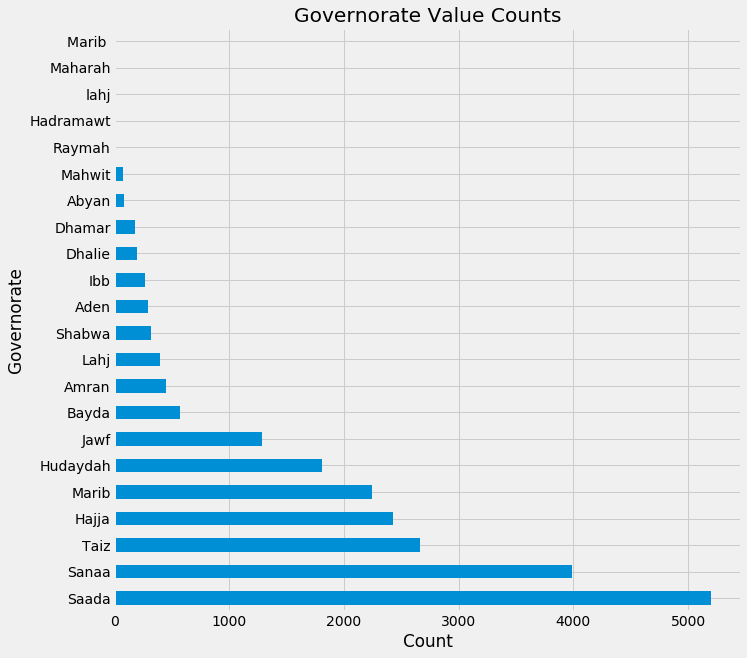

In [110]:
# Value counts for governorate
df.governorate.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Governorate Value Counts')
plt.ylabel('Governorate')
plt.xlabel('Count');

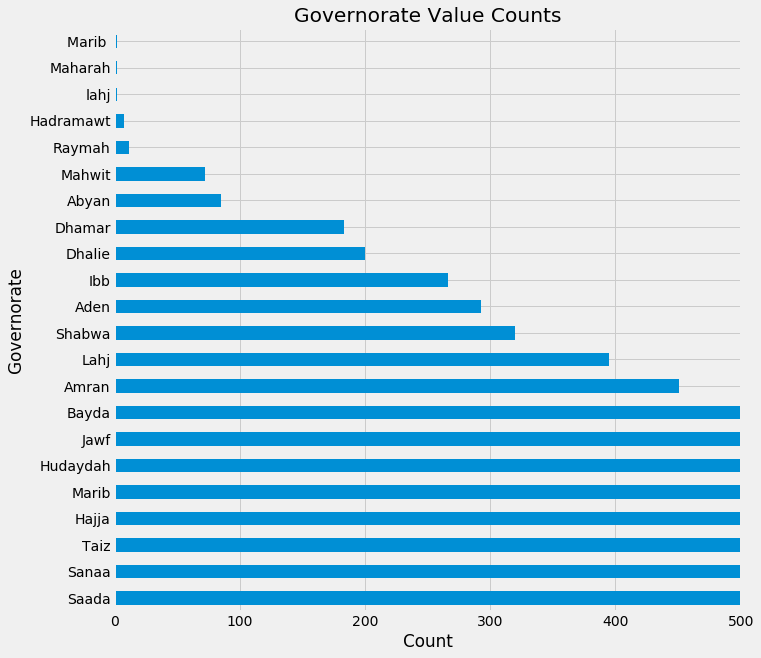

In [111]:
# Value counts for governorate with more granularity for the smaller values
df.governorate.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Governorate Value Counts')
plt.ylabel('Governorate')
plt.xlabel('Count')
plt.xlim(0, 500);

In [112]:
district_vals =  df['district'].value_counts().loc[lambda x : x>100] 

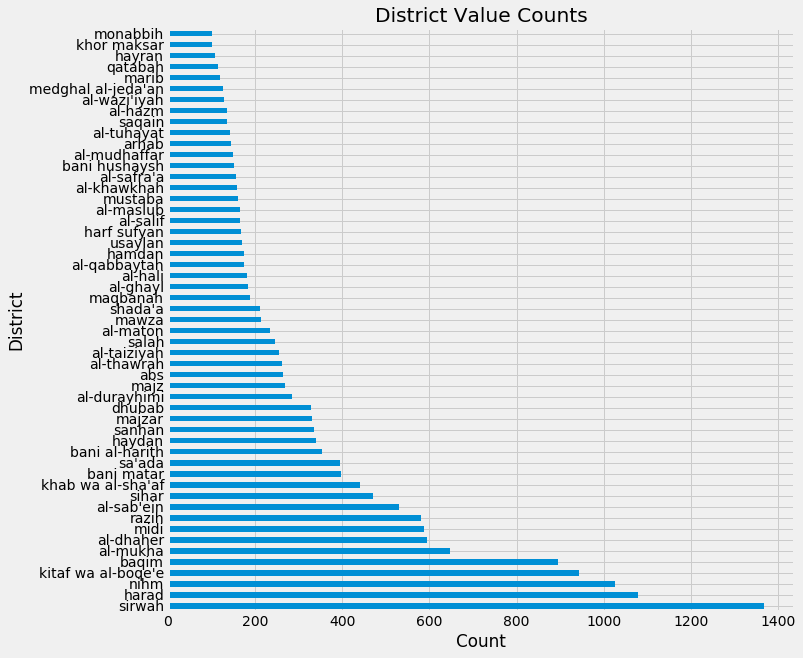

In [113]:
# Value counts for district where value counts is greater than 100 
district_vals.plot(kind='barh', figsize=(10,10))
plt.title('District Value Counts')
plt.ylabel('District')
plt.xlabel('Count');

In [114]:
area_vals = df['area'].value_counts().loc[lambda x : x>100] 

In [115]:
area_vals # what is this - ?? Need to go back and clean that up

-                    4360
Unknown              3300
The City              250
Al-Nahdain            247
Al-Rahabah            177
Al-Omary              145
Marran                139
Al-Mukha junction     135
Al-Jabbanah           134
Faj Attan             113
Noqom mountain        102
Name: area, dtype: int64

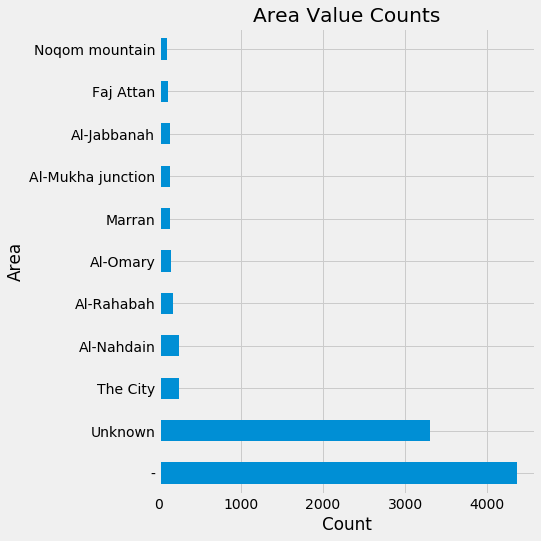

In [116]:
# Value counts for area where val counts greater than 100
area_vals.plot(kind='barh', figsize=(6,8))
plt.title('Area Value Counts')
plt.ylabel('Area')
plt.xlabel('Count');

In [117]:
df.columns

Index(['date', 'incident_id', 'governorate', 'district', 'area', 'target',
       'main_category', 'sub_category', 'min_air_raids', 'max_air_raids',
       'civilian_casualties', 'fatalities', 'woman_fatalities',
       'child_fatalities', 'injured', 'woman_injured', 'child_injured',
       'confirmed_time', 'time_of_day'],
      dtype='object')

In [118]:
# value counts for area when dropping 'unknown' and - 
df['area'].replace(['-', 'Unknown'], np.nan)

0                         Al-Rahabah
1                            Airport
2           Al-Sonblah Neighbourhood
3                         Al-Nahdain
4                         Al-Nahdhah
                    ...             
22480    Raymat Humayd Military Camp
22481    Raymat Humayd Military Camp
22482                     Wadi Rijam
22483                     Ar Rahabah
22484                            NaN
Name: area, Length: 22485, dtype: object

In [119]:
df['target'].value_counts()

Unknown                                 8364
Pro-Houthi forces                       2123
Residential Area                         590
Pro-Houthi sites                         403
Pro-Houthi positions                     396
                                        ... 
Site neat 140th air defnce Brigade         1
House ( belongs toMohammed Al-Afad )       1
Bawn market                                1
Pro-Houthi Financing camp                  1
The old customs building                   1
Name: target, Length: 2884, dtype: int64

In [120]:
target_vals =  df['target'].value_counts().loc[lambda x : x>200] 

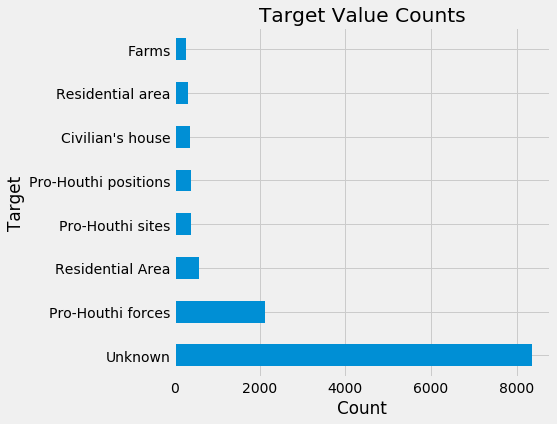

In [121]:
# Value counts for target ## may want to drop unkown to look at this 
target_vals.plot(kind='barh', figsize=(6,6))
plt.title('Target Value Counts')
plt.ylabel('Target')
plt.xlabel('Count');

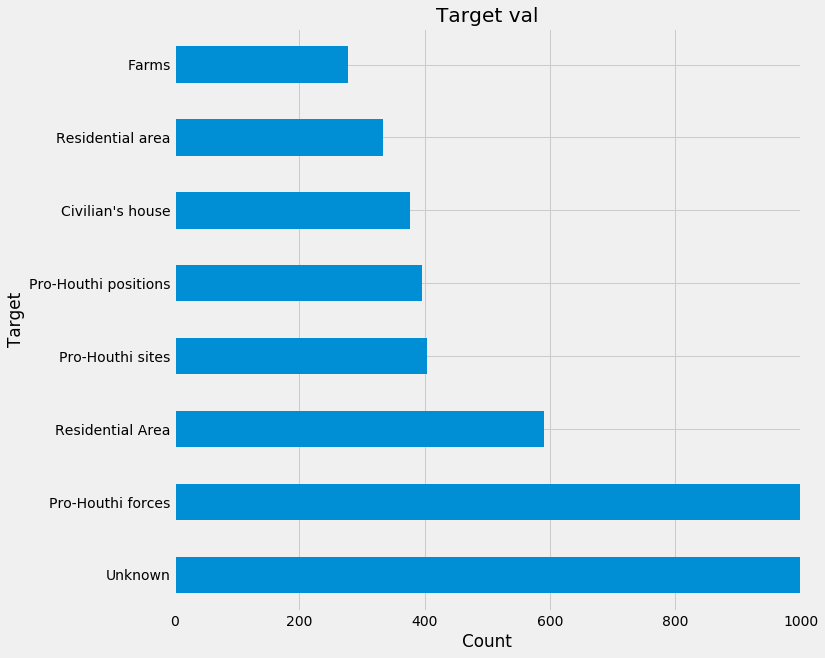

In [122]:
# Value counts for target with more granularity
target_vals.plot(kind='barh', figsize=(10,10))
plt.title('Target val')
plt.ylabel('Target')
plt.xlabel('Count')
plt.xlim(0, 1000);

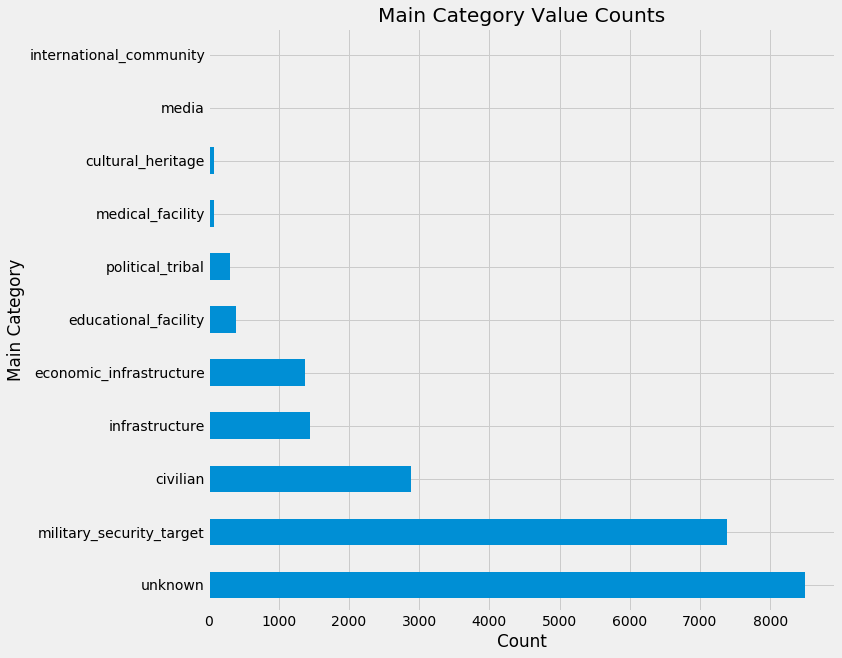

In [123]:
# Value counts for main_category
df.main_category.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Main Category Value Counts')
plt.ylabel('Main Category')
plt.xlabel('Count');

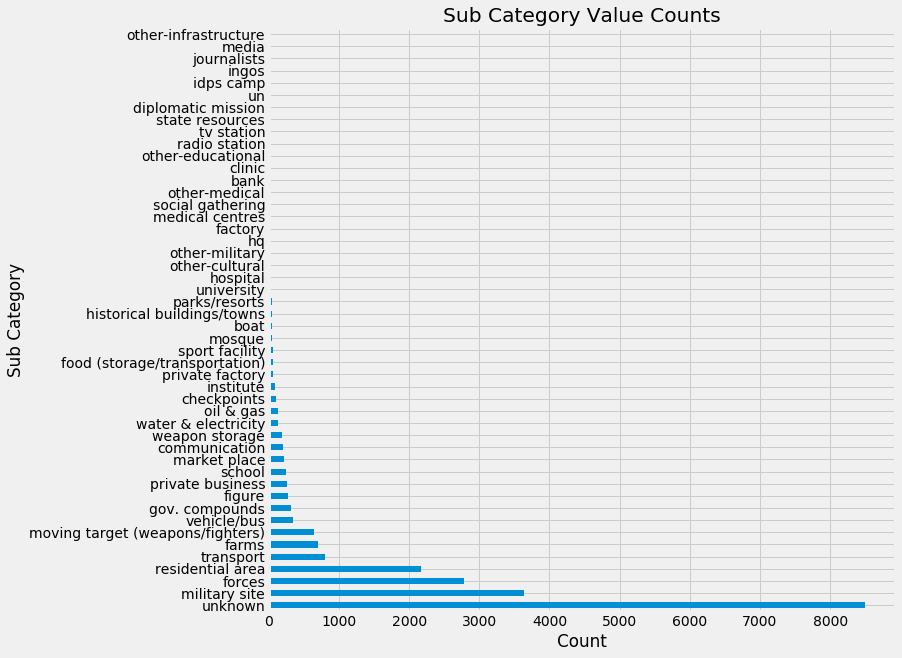

In [124]:
# Value counts for sub_category
df.sub_category.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Sub Category Value Counts')
plt.ylabel('Sub Category')
plt.xlabel('Count');

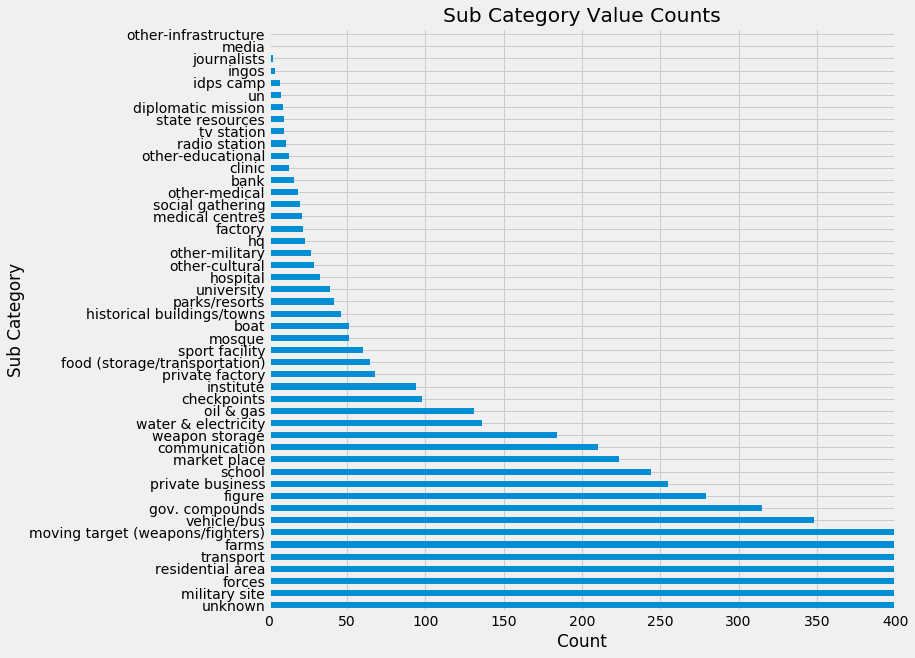

In [125]:
# Value counts for sub_category with more granularity
df.sub_category.value_counts().plot(kind='barh', figsize=(10,10))
plt.title('Sub Category Value Counts')
plt.ylabel('Sub Category')
plt.xlabel('Count');
plt.xlim(0, 400);

In [126]:
df.columns

Index(['date', 'incident_id', 'governorate', 'district', 'area', 'target',
       'main_category', 'sub_category', 'min_air_raids', 'max_air_raids',
       'civilian_casualties', 'fatalities', 'woman_fatalities',
       'child_fatalities', 'injured', 'woman_injured', 'child_injured',
       'confirmed_time', 'time_of_day'],
      dtype='object')

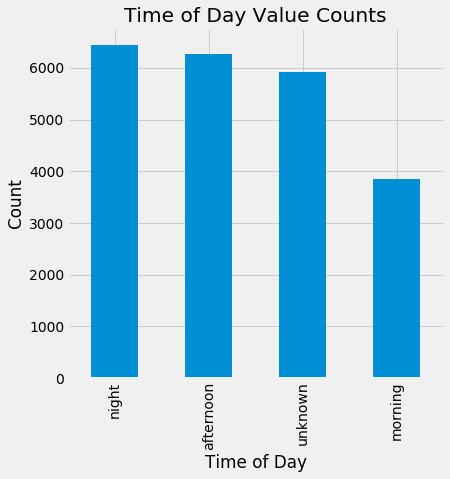

In [127]:
# Value counts for time of day
df.time_of_day.value_counts().plot(kind='bar', figsize=(6,6))
plt.title('Time of Day Value Counts')
plt.ylabel('Count')
plt.xlabel('Time of Day');

In [128]:
df['max_air_raids'].describe()

count    22485.000000
mean         3.061330
std          4.493291
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        250.000000
Name: max_air_raids, dtype: float64

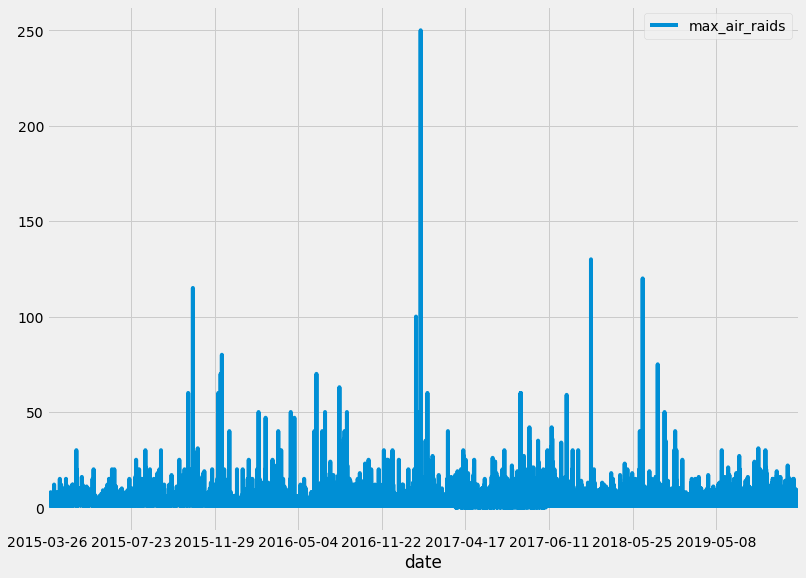

In [129]:
df.plot(x='date', y='max_air_raids', figsize=(12,9));

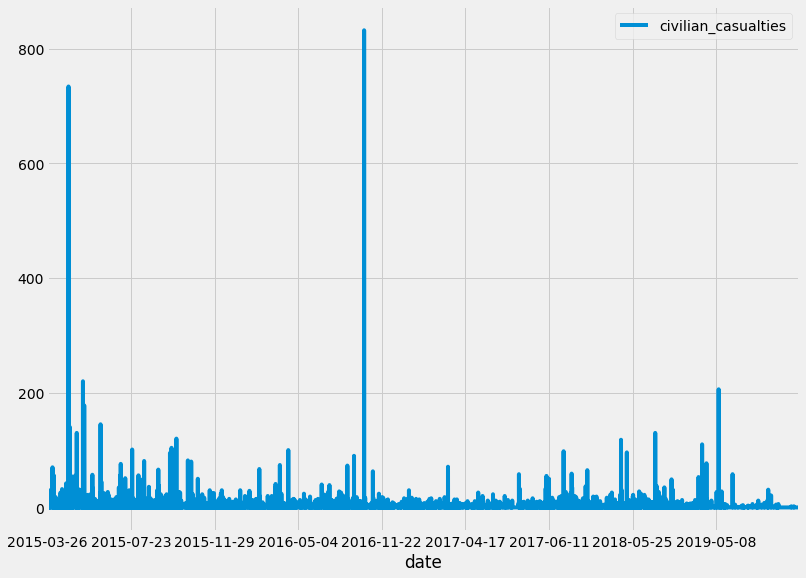

In [130]:
df.plot(x='date', y='civilian_casualties', figsize=(12,9));

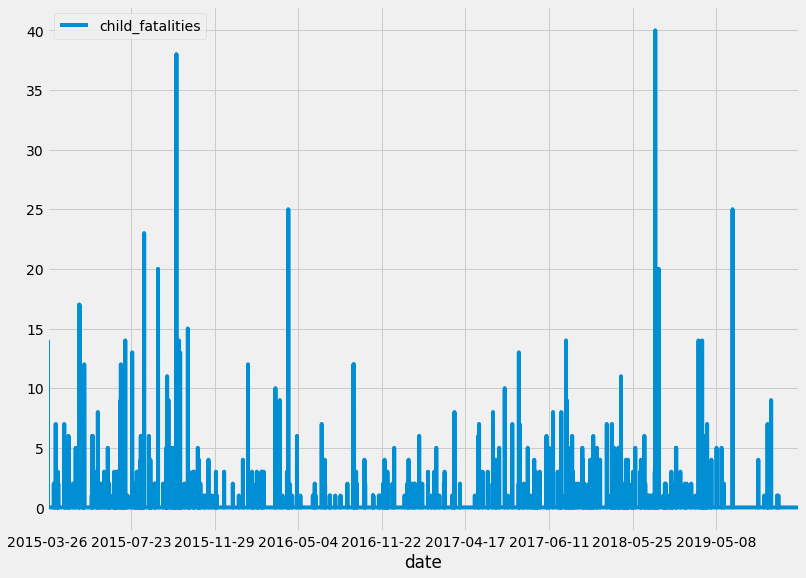

In [131]:
df.plot(x='date', y='child_fatalities', figsize=(12,9));

In [132]:
df.columns

Index(['date', 'incident_id', 'governorate', 'district', 'area', 'target',
       'main_category', 'sub_category', 'min_air_raids', 'max_air_raids',
       'civilian_casualties', 'fatalities', 'woman_fatalities',
       'child_fatalities', 'injured', 'woman_injured', 'child_injured',
       'confirmed_time', 'time_of_day'],
      dtype='object')

In [133]:
df['governorate'].value_counts()

Saada        5199
Sanaa        3986
Taiz         2661
Hajja        2429
Marib        2248
Hudaydah     1811
Jawf         1284
Bayda         576
Amran         451
Lahj          395
Shabwa        320
Aden          293
Ibb           266
Dhalie        200
Dhamar        183
Abyan          85
Mahwit         72
Raymah         12
Hadramawt       8
lahj            2
Maharah         2
Marib           2
Name: governorate, dtype: int64

In [ ]:
# code from: https://www.geeksforgeeks.org/how-to-find-longitude-and-latitude-for-a-list-of-regions-or-country-using-python/

In [134]:
import geopy 
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
   
# declare an empty list to store 
# latitude and longitude of values  
# of city column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given city  
def findGeocode(city): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(city) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(city)     
  


In [135]:
# edit code get list of governorates... 

In [136]:
df["governorate"].unique()

array(['Sanaa', 'Dhalie', 'Hajja', 'Lahj', 'Saada', 'Taiz', 'Abyan',
       'Hudaydah', 'Marib', 'Amran', 'Dhamar', 'Jawf', 'Bayda', 'Shabwa',
       'Aden', 'Ibb', 'Raymah', 'Mahwit', 'Hadramawt', 'lahj', 'Maharah',
       'Marib '], dtype=object)

In [137]:
# each value from governorate column 
# will be fetched and sent to 
# function find_geocode    
for i in (df["governorate"].unique()): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  
        # function is stored into 
        # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan) 

In [142]:
df.columns

Index(['date', 'incident_id', 'governorate', 'district', 'area', 'target',
       'main_category', 'sub_category', 'min_air_raids', 'max_air_raids',
       'civilian_casualties', 'fatalities', 'woman_fatalities',
       'child_fatalities', 'injured', 'woman_injured', 'child_injured',
       'confirmed_time', 'time_of_day'],
      dtype='object')

In [160]:
df['governorate'].unique()

array(['Sanaa', 'Dhalie', 'Hajja', 'Lahj', 'Saada', 'Taiz', 'Abyan',
       'Hudaydah', 'Marib', 'Amran', 'Dhamar', 'Jawf', 'Bayda', 'Shabwa',
       'Aden', 'Ibb', 'Raymah', 'Mahwit', 'Hadramawt', 'lahj', 'Maharah',
       'Marib '], dtype=object)

In [159]:
df.groupby(by=['governorate'])['max_air_raids'].sum()

governorate
Abyan          185.0
Aden           592.0
Amran         1226.0
Bayda         1603.0
Dhalie         419.0
Dhamar         485.0
Hadramawt       16.0
Hajja        11828.0
Hudaydah      5154.0
Ibb            678.0
Jawf          3924.0
Lahj          1033.0
Maharah          4.0
Mahwit         222.0
Marib         8287.0
Marib            3.0
Raymah          28.0
Saada        14315.0
Sanaa        10621.0
Shabwa         741.0
Taiz          7467.0
lahj             3.0
Name: max_air_raids, dtype: float64

In [ ]:
map_data = ('latitude')

In [138]:
latitude

[15.3538569,
 32.3636488,
 15.694247,
 14.759635,
 17.063405,
 13.4115414,
 13.786202,
 36.2764239,
 15.5986243,
 16.230218,
 14.7384268,
 29.7673818,
 32.7609529,
 13.516667,
 12.789585,
 14.1419291,
 15.218682,
 15.391981,
 16.7323022,
 14.759635,
 13.271756,
 15.5986243]

In [139]:
longitude

[44.2058841,
 76.5227792,
 43.605821,
 44.225094,
 43.914884,
 43.5570871,
 46.141766,
 38.1404362,
 45.2598934,
 43.909834,
 44.2709597,
 39.5629883,
 21.7577175,
 44.433333,
 45.028504,
 44.1389849,
 43.940158,
 43.536162,
 48.6084967,
 44.225094,
 44.003517,
 45.2598934]